In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = 'drive/MyDrive/Grape'

In [ ]:
os.listdir(data_dir)

['grape']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
from matplotlib.image import imread

In [ ]:
grape = data_dir + '//grape//'

In [ ]:
os.listdir(grape)

['black_rot', 'grape_esca', 'grape_healthy', 'grape_leaf_blight']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
directory_root = 'drive/MyDrive/Grape'

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = os.listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = os.listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = os.listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(imread(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing black_rot ...
[INFO] Processing grape_esca ...
[INFO] Processing grape_healthy ...
[INFO] Processing grape_leaf_blight ...
[INFO] Image loading completed


In [ ]:
len(image_list)

4062

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
import pickle

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl','wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
print(label_binarizer.classes_)

['black_rot' 'grape_esca' 'grape_healthy' 'grape_leaf_blight']


In [ ]:
np_image_list = np.array(image_list,dtype = np.float16)/255
np_image_list.shape

(4062, 256, 256, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.33, random_state=101)

In [ ]:
image_gen = ImageDataGenerator(width_shift_range=0.1,
                              height_shift_range=0.1,
                               zoom_range=0.1,
                               fill_mode='nearest',
                               horizontal_flip=True,
                               rotation_range=25,
                               shear_range=0.2
                              )

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm

In [ ]:
IMAGE_SIZE = [256,256]

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [ ]:
r = model.fit_generator(
  image_gen.flow(X_train,y_train),
  validation_data=(X_test,y_test),
  epochs=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
86/86 [==============================] - 604s 7s/step - loss: 2.8077 - accuracy: 0.8317 - val_loss: 0.2907 - val_accuracy: 0.9597
Epoch 2/20
86/86 [==============================] - 594s 7s/step - loss: 0.3342 - accuracy: 0.9522 - val_loss: 0.1987 - val_accuracy: 0.9650
Epoch 3/20
86/86 [==============================] - 593s 7s/step - loss: 0.4825 - accuracy: 0.9397 - val_loss: 0.1993 - val_accuracy: 0.9709
Epoch 4/20
86/86 [==============================] - 593s 7s/step - loss: 0.4825 - accuracy: 0.9508 - val_loss: 0.1984 - val_accuracy: 0.9679
Epoch 5/20
86/86 [==============================] - 593s 7s/step - loss: 0.4267 - accuracy: 0.9519 - val_loss: 0.1279 - val_accuracy: 0.9784
Epoch 6/20
86/86 [==============================] - 594s 7s/step - loss: 0.4399 - accuracy: 0.9526 - val_loss: 0.2645 - val_accuracy: 0.9635
Epoch 7/20
86/86 [==============================] - 593s 7s/step - loss: 0.4743 - accuracy: 0.9588 - val_loss: 0.7186 - val_accuracy: 0.9329
Epoch 8/20
86

In [ ]:
metrics = pd.DataFrame(model.history.history)

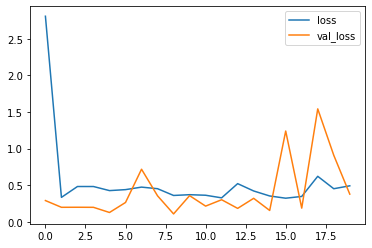

In [ ]:
metrics[['loss','val_loss']].plot()

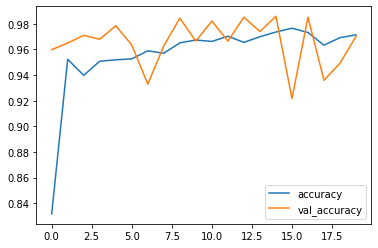

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(X_test,y_test)

42/42 [==============================] - 185s 4s/step - loss: 0.3784 - accuracy: 0.9702


[0.37838202714920044, 0.9701715111732483]

In [ ]:
pred = model.predict(X_test)
pred

array([[1.0000000e+00, 2.6535888e-17, 3.5732003e-35, 1.9196425e-35],
       [2.0671326e-14, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4085820e-21, 0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.6424387e-10, 1.0000000e+00, 1.1869689e-28, 6.2364591e-10],
       [1.0000000e+00, 0.0000000e+00, 1.4946234e-38, 0.0000000e+00]],
      dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_miniproject_inception.h5')

In [ ]:
from matplotlib.image import imread
import numpy as np

In [ ]:
newm = load_model('model_miniproject_inception.h5')

In [ ]:
os.listdir('D:\\mini project\\dataset\\Grape\\grape\\grape_esca')

['0075b632-2e34-4e4f-9697-fe2b332b7ef8___FAM_B.Msls 4399.JPG',
 '00b65fe8-cee1-4b68-8ef4-1211814f2845___FAM_B.Msls 3990.JPG',
 '00c247e8-48d2-4a56-a9f3-4eacfb4d85be___FAM_B.Msls 4197.JPG',
 '01162551-b800-4df8-ac46-64d17d6ac5bf___FAM_B.Msls 1153.JPG',
 '011bb69d-fb9c-4fb9-b8cc-031e91270ec2___FAM_B.Msls 4288.JPG',
 '011f307f-e06b-4604-9419-d940f7b00290___FAM_B.Msls 1096.JPG',
 '019afd88-6645-44c4-a5d2-bd583b877a50___FAM_B.Msls 1744.JPG',
 '01c74b8d-1113-47c0-86a3-6ceea27853c0___FAM_B.Msls 4113.JPG',
 '02223cc6-30d2-408d-a091-65257d044a50___FAM_B.Msls 0908.JPG',
 '023df989-ab4c-4f66-a6c8-a41c1142ab7d___FAM_B.Msls 1834.JPG',
 '025a9fa7-827a-43c3-a82f-66d9cbfb2055___FAM_B.Msls 4282.JPG',
 '0279ec2c-5470-47e8-b1ba-79442bd323bb___FAM_B.Msls 4396.JPG',
 '02af0429-46c1-444b-bf62-a4d0198141e8___FAM_B.Msls 1062.JPG',
 '0336e894-5963-4a7e-9b56-e802473ae4c5___FAM_B.Msls 1231.JPG',
 '037b6ea5-3d81-4489-b7a3-1116ee2cc6e1___FAM_B.Msls 0944.JPG',
 '03c1559d-52a2-455f-b682-5c3d266b05b7___FAM_B.Msls 381

In [ ]:
image_dir = "D:\\mini project\\dataset\\Grape\\grape\\grape_esca\\011bb69d-fb9c-4fb9-b8cc-031e91270ec2___FAM_B.Msls 4288.JPG"

im =imread(image_dir)

np_image_li = np.array(im,dtype = np.float16)/255
npp_image = np.expand_dims(np_image_li, axis=0)

In [ ]:
result = newm.predict(npp_image)

In [ ]:
print(result)

[[2.3400182e-30 1.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [ ]:
itemindex = np.where(result==np.max(result))
print('probablity:'+str(np.max(result))+'\n'+label_binarizer.classes_[itemindex[1][0]])

probablity:1.0
grape_esca
